<a href="https://colab.research.google.com/github/MichalBalcerak/ML24-25/blob/main/Homework07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assume we have


*   A data set $\{y_i\}_{i=1}^n$ of binary labels $y_i\in\{0,1\}$
*   Constants: $m$ - the number of ones $\{i: y_i=1\}$, $\quad$ $k$ - the numbers of zeros $\{i: y_i=0\}$
* A set of predictions $f_i=f_{m-1}(x_i)$ obtained from a previous stage where the $f_i$  values are generated randomly from a normal distribution

## A: Fitting a Constant Predictor from Scratch

The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$

where loss function $L$ is defined as:
$$L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z))$$

$\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

In order to find the minimum of the function $\sum_{i=1}^{n} L(y_i, \lambda)$, I compute first and second derrivative of $L=L(y_i,\lambda)$ with respect to $\lambda$:


$$\frac{\partial L(y_i,\lambda)}{\partial\lambda}=\frac{e^{\lambda}(1-y_i)-y_i}{e^{\lambda}+1}$$


$$\frac{\partial^2 L(y_i,\lambda)}{\partial\lambda^2}=\frac{e^\lambda}{(e^\lambda+1)^2}$$

Since $\frac{\partial^2 L(y_i,\lambda)}{\partial\lambda^2}>0$ for all $i$, we also have
$$\frac{\partial^2}{\partial\lambda^2}\sum_{i=1}^{n} L(y_i, \lambda)=\sum_{i=1}^{n}\frac{\partial^2}{\partial\lambda^2}L(y_i, \lambda)>0$$

thus the examined function is strictly convex - its global minimum is in critical point, i.e. $\lambda^*$ such that
$$\frac{\partial }{\partial\lambda}\sum_{i=1}^{n} L(y_i, \lambda)=\sum_{i=1}^{n}\frac{\partial }{\partial\lambda} L(y_i, \lambda)=\sum_{i=1}^{n}\frac{e^{\lambda}(1-y_i)-y_i}{e^{\lambda}+1}=0$$

Therefore:
$$\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)=\log\left(\frac{\sum_{i=1}^n y_i}{\sum_{i=1}^n (1-y_i)}\right)$$

which, with above notation, is equal to

$$\lambda^*=\log\left(\frac{m}{k}\right)$$

Thus, in terms of the dataset's label distribution, this constant represents class 1 ($y_i=1$) to class 2 ($y_i=0$) ratio.

## B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Assume we have an existing predictor $f_i=f_{m-1}(x_i)$. We would like to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes
$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$

As in the previous situation, I compute first and second derrivative of $L=L(y_i,f_i+\lambda)$ with respect to $\lambda$:

$$\frac{\partial L(y_i,\lambda)}{\partial\lambda}=\frac{e^{f_i+\lambda}(1-y_i)-y_i}{e^{f_i+\lambda}+1}$$


$$\frac{\partial^2 L(y_i,\lambda)}{\partial\lambda^2}=\frac{e^{f_i+\lambda}}{(e^{f_i+\lambda}+1)^2}$$

As in the above situation, examined function $\sum_{i=1}^{n} L(y_i, f_i + \lambda)$ is strictly convex because we have:

$$\frac{\partial^2}{\partial\lambda^2}\sum_{i=1}^{n} L(y_i, f_i+\lambda)=\sum_{i=1}^{n}\frac{\partial^2}{\partial\lambda^2}L(y_i, f_i+\lambda)>0$$

Therefore desired minimizer $\lambda^*$ is given by the following equation:
$$\frac{\partial }{\partial\lambda}\sum_{i=1}^{n} L(y_i, f_i+\lambda)=\sum_{i=1}^{n}\frac{\partial }{\partial\lambda} L(y_i, f_i+\lambda)=\sum_{i=1}^{n}\frac{e^{f_i+\lambda}(1-y_i)-y_i}{e^{f_i+\lambda}+1}=0$$

However, due to the fact that $f_i$ is different for various indices $i$ and non-linearity of the sigmoid function in the binary cross-entropy loss, we are not able to find the solution of the above eqaution.

## Loss Landscape Exploration

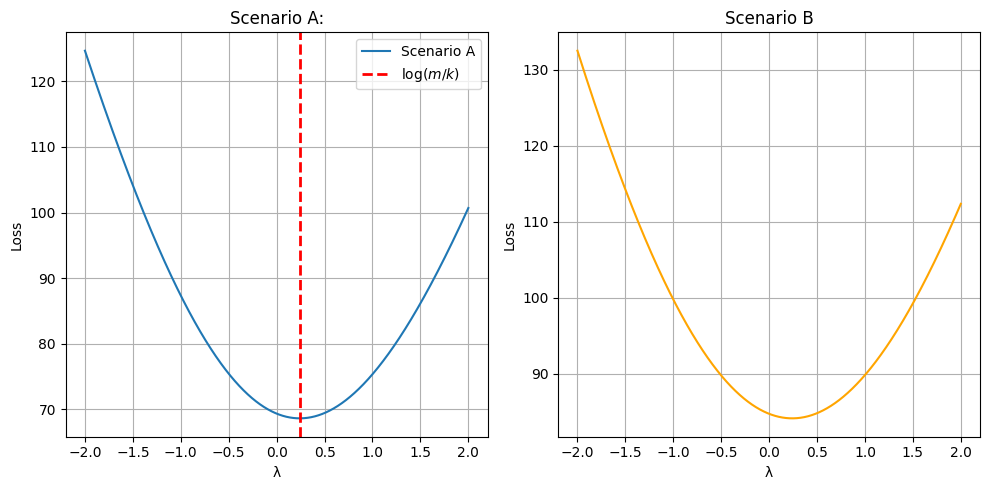

In [2]:
import numpy as np
from matplotlib import pyplot as plt


np.random.seed(0)

n = 100

labels = np.random.randint(0, 2, size=n)
m = np.count_nonzero(labels)
k = n-m
f = np.random.randn(n)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def L(y,z):
    return -y*np.log(sigmoid(z)) - (1-y)*np.log(1-sigmoid(z))

lambd = np.arange(-2,2,0.0001)


L_a = [np.sum(L(labels,l)) for l in lambd]
L_b = [np.sum(L(labels, f + l)) for l in lambd]

plt.figure(figsize=(10, 5))

minimum = np.log(m / k)

plt.subplot(1, 2, 1)
plt.plot(lambd, L_a, label='Scenario A')
plt.axvline(minimum, color='red', linestyle='--', linewidth=2, label=r'$\log(m/k)$')
plt.title("Scenario A:")
plt.xlabel("λ")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(lambd, L_b, label='Scenario B', color='orange')
plt.title("Scenario B")
plt.xlabel("λ")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()


The loss landscape in Scenario A is simple - smooth, strictly convex, and with a closed-form minimizer (marked by the red line). In Scenario B the loss remains convex and visually quite simple as well. Both plots are unimodal, so the complexity of the loss landscape is not what makes finding the minimizer in Scenario B difficult. As explained above, the challenge comes from the non-linearity of the sigmoid function. Therefore, the minimum of the loss in Scenario B must be found numerically. However, due to the convexity of the loss function, this is still tractable using standard numerical optimization methods.